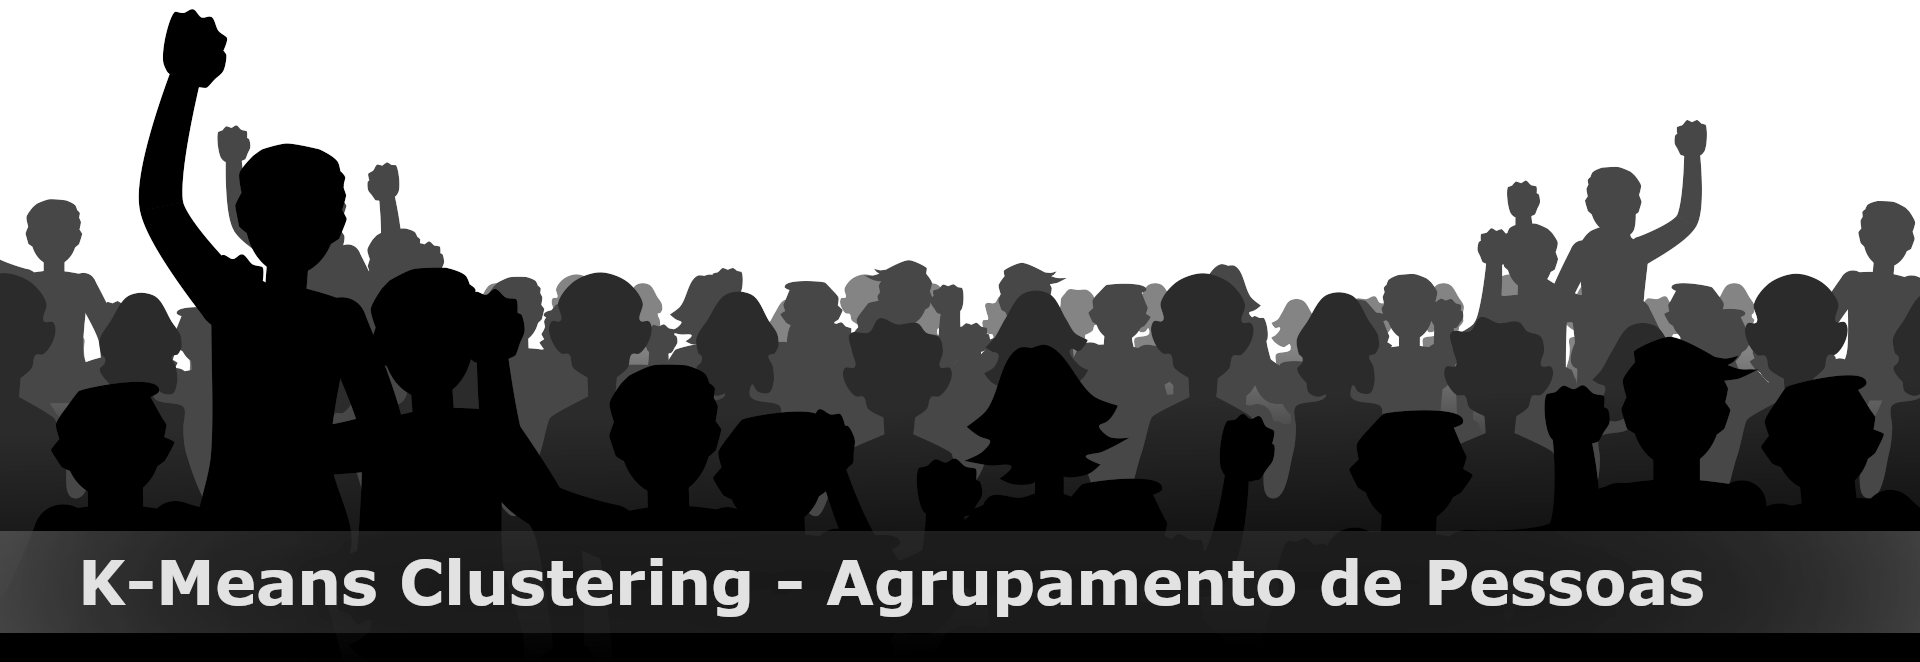

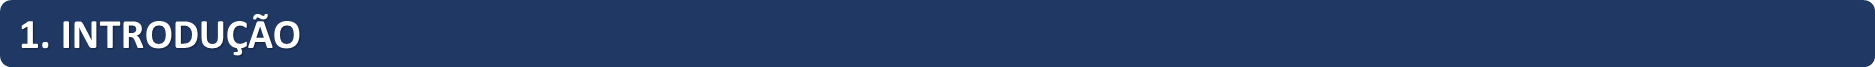

**Utilizando uma base de dados de hospital, disponível no [Kaggle](https://www.kaggle.com/tigganeha4/diabetes-dataset-2019), resolvi aplicar os conhecimentos adquiridos sobre clusterização. O *Dataset* possui aproximadamente 1.000 registros com 18 caracaterísticas cada, entre elas o gênero do paciente, idade, a frequência com que pratica atividades físicas, se a pessoa é diabética entre outras.**

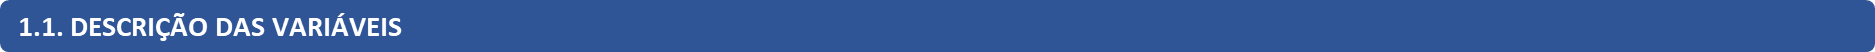

|     **Variável**     	|                       **Descrição**                       	|
|:--------------------:	|:---------------------------------------------------------:	|
|        **Age**       	|                     Idade do paciente.                    	|
|      **Gender**      	|         Gênero do paciente (Masculino e Feminino).        	|
|  **Family_Diabetes** 	| Indica se há pessoas na família do paciente com diabetes. 	|
|      **highBP**      	|                       Pressão Alta.                       	|
| **PhysicallyActive** 	|        Informa o tempo de atividade física diária.        	|
|        **BMI**       	|        IMC do paciente (Índice de Massa Corporal).        	|
|      **Smoking**     	|              Indica se o paciente é fumante.              	|
|      **Alcohol**     	|            Indica se o paciente consome álcool.           	|
|       **Sleep**      	|                 Horas de sono do paciente.                	|
|    **SoundSleep**    	|            Horas de sono profundo do paciente.            	|
|  **RegularMedicine** 	|     Informa se o paciente vai ao médico regularmente.     	|
|     **JunkFood**     	|       Informa a frequência de consumo de JunkFoods.       	|
|      **Stress**      	|           Indica o nível de stress do paciente.           	|
|      **BPLevel**     	|                     Pressão sanguínea.                    	|
|    **Pregancies**    	|                   Quantidade de filhos.                   	|
|     **Pdiabetes**    	|              Histórico de diabetes familiar.              	|
|   **UriationFreq**   	|                     Frequência urina.                     	|
|     **Diabetic**     	|             Informa se o paciente é diabético.            	|

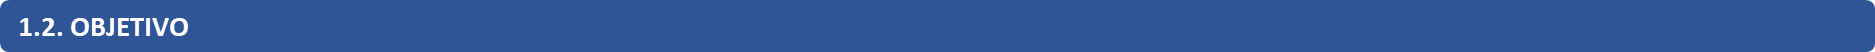

**Efetuar uma breve análise dos dados, porém o foco aqui será na aplicação do algoritmo *K-Means*, visando efetuar uma separação adequada dos dados, permitindo então que seja realizada uma análise mais profunda em cada *cluster*, extraindo características individuais e importantes de cada grupo e apresentado-as por meio de gráficos. Utilizarei também a biblioteca KElbowVisualizer para determinar o número ideal de grupos.**

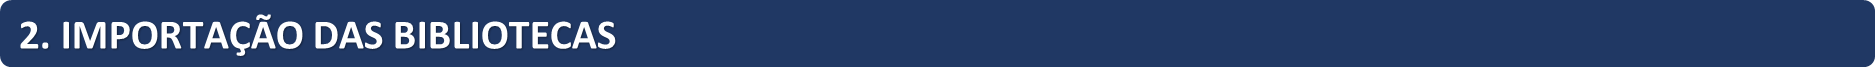

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

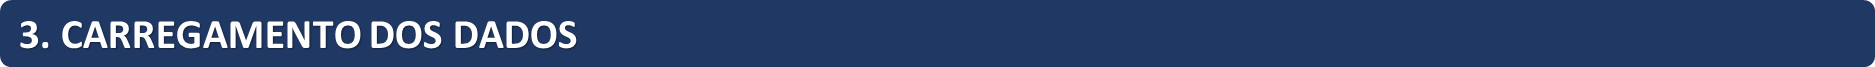

In [2]:
df = pd.read_csv('Arquivos/diabetes_dataset__2019.csv')

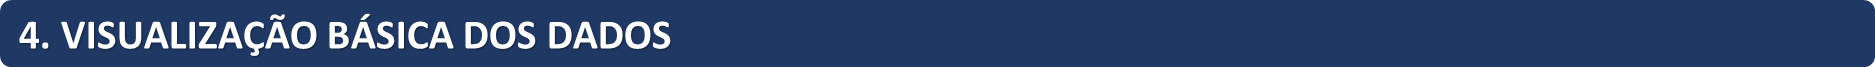

In [3]:
df.head(2)

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no


In [4]:
print(f'\033[1m{df.shape[0]} linhas\033[0m por \033[1m{df.shape[1]} colunas\033[0m. Sendo uma, o "Index".')

952 linhas por 18 colunas. Sendo uma, o "Index".


In [5]:
# Criação de função para exibir as informações das colunas e a existência de valores ausentes.
def check_values(feature, not_null=True):    
    if not_null:
        if df[feature].isnull().sum():
            return feature        
    else:        return df[feature].value_counts()

In [6]:
# Exibição das informações das colunas do DataFrame.
for coluna in df.columns:
    print(f'\033[1m{coluna}\033[0m\n'.center(50))
    print(check_values(coluna, False), end='\n\n')
    print('-'*40)

                   Age
                   
less than 40    488
40-49           164
50-59           156
60 or older     144
Name: Age, dtype: int64

----------------------------------------
                 Gender
                  
Male      580
Female    372
Name: Gender, dtype: int64

----------------------------------------
             Family_Diabetes
             
no     498
yes    454
Name: Family_Diabetes, dtype: int64

----------------------------------------
                 highBP
                  
no     724
yes    228
Name: highBP, dtype: int64

----------------------------------------
            PhysicallyActive
             
less than half an hr    336
more than half an hr    272
one hr or more          212
none                    132
Name: PhysicallyActive, dtype: int64

----------------------------------------
                   BMI
                   
24.0    111
21.0     88
23.0     76
28.0     71
26.0     66
33.0     64
27.0     63
22.0     58
20.0     48
19.0     

***
### Observações:
* **Age:** Idades dentro de uma faixa normal;
* **Gênero:** Nenhum dado 'anormal', apenas *'Male'* e *'Female'*;
* **Family_Diabetes:** Nenhum dado 'anormal', apenas *'No'* e *'Yes'*;
* **highBP:** Nenhum dado 'anormal', apenas *'No'* e *'Yes'*;
* **hysicallyActive:** Nenhum dado 'anormal';
* **BMI:** Nenhum dado 'anormal';
* **Smoking:** Nenhum dado 'anormal', apenas *'No'* e *'Yes'*;
* **Alcohol:** Nenhum dado 'anormal', apenas *'No'* e *'Yes'*;
* **Sleep:** Nenhum dado 'anormal';
* **SoundSleep:** Nenhum dado 'anormal'
* **RegularMedicine:** Um valor 'o', provavelmente *'No'*, iremos substituir mais adiante (Etapa 5.2.);
* **JunkyFood:** Nenhum dado 'anormal';
* **Stress:** Nenhum dado 'anormal';
* **BPLevel:** Dados duplicados *'high'*, *'normal'* e *'low'*, iremos tratá-los mais adiante (Etapa 5.2.);
* **Pregancies:** Nenhum dado 'anormal';
* **Pdiabetes:** Um valor '0', provavelmente *'No'*, iremos substituir mais adiante (Etapa 5.2.);
* **UriationFreq:** Nenhum dado 'anormal'; e
* **Diabetic:** Valor *'no'* com espaço em branco, iremos tratá-lo mais adiante (Etapa 5.2.).
***

In [7]:
# Exibição das colunas com valores ausentes.
lista_nan = [col for col in df.columns if check_values(col)]
print(f'As colunas: \033[1m{lista_nan}\033[0m possuem valores ausentes.')

As colunas: ['BMI', 'Pregancies', 'Pdiabetes', 'Diabetic'] possuem valores ausentes.


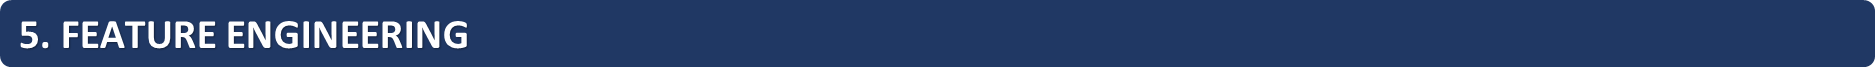

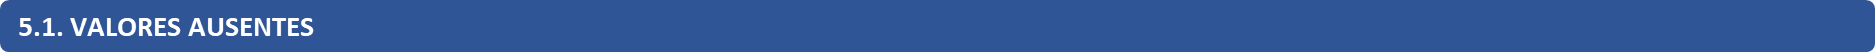
<a name="tratamentoDados"></a>

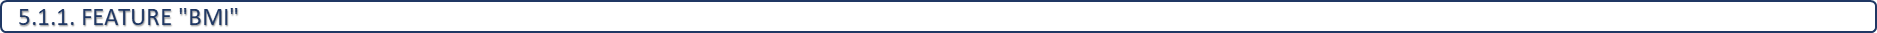

In [8]:
# Detactando o valor da mediana de BMI de acordo com o Gênero e Idade da pessoa.
medianaBMI = df.groupby(['Gender', 'Age'])['BMI'].median()

In [9]:
# Criação da função para percorrer o DataFrame e posterior aplicação da mesma.
def substituirNaNBMI(l):
    if pd.isnull(l['BMI']):
        return medianaBMI[l['Gender'], l['Age']]
    else:
        return l['BMI']
df.BMI = df.apply(substituirNaNBMI, axis = 1)

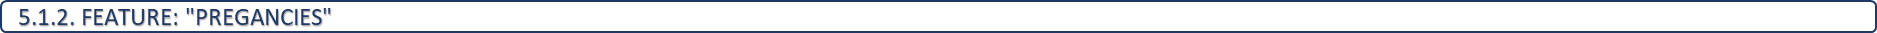

In [10]:
# Detactando o valor da mediana de Pregancies de acordo com o Gênero e Idade da pessoa.
medianaPregancies = df.groupby(['Gender', 'Age'])['Pregancies'].median()

In [11]:
# Criação da função para percorrer o DataFrame e posterior aplicação da mesma.
def substituirNaNPregancies(l):
    if pd.isnull(l['Pregancies']):
        return medianaPregancies[l['Gender'], l['Age']]
    else:
        return l['Pregancies']
df.Pregancies = df.apply(substituirNaNPregancies, axis = 1)

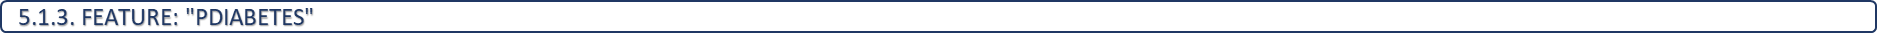

In [12]:
# Atribuição do valor da moda aos valores ausentes da coluna 'Pdiabetes'.
df.Pdiabetes.fillna(df.Pdiabetes.mode()[0], inplace=True)

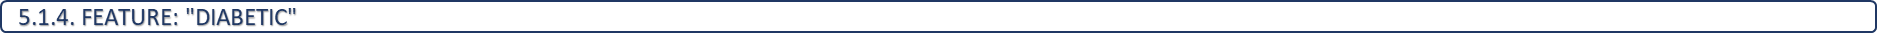

In [13]:
# Atribuição do valor da moda aos valores ausentes da coluna 'Diabetic'.
df.Diabetic.fillna(df.Diabetic.mode()[0], inplace=True)

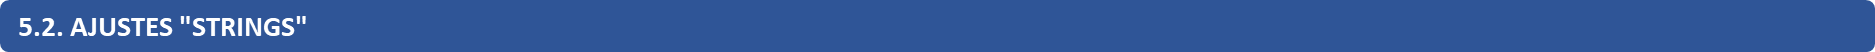

In [14]:
# Tratamento das strings detectadas na Etapa 4. Visualização Básica dos Dados.
df.RegularMedicine.replace('o', 'no', inplace=True)
df.BPLevel = df.BPLevel.str.strip().str.lower()
df.Pdiabetes.replace('0', 'no', inplace=True)
df.Diabetic = df.Diabetic.str.strip()

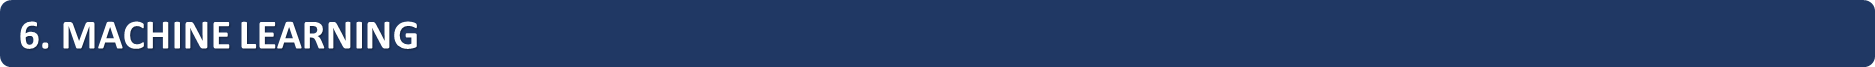

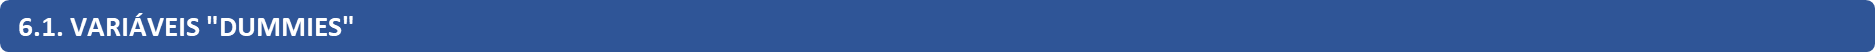

In [15]:
# Transformação das variáveis categóricas.
df_d = pd.get_dummies(df)
X = df_d.div(df_d.sum(axis=1), axis=0)

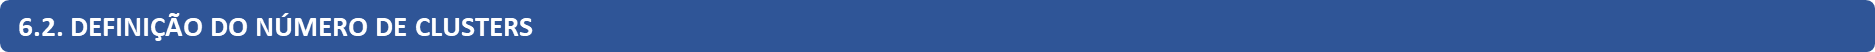
<a name="graficoK"></a>

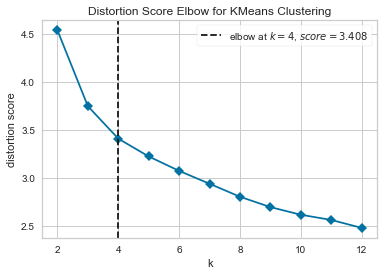

In [16]:
# Aplicação do Elbow Method para definir o número de clusters mais adequado.
el = KElbowVisualizer(KMeans(), k= 12,timings=False)
el.fit(X)
el.show();

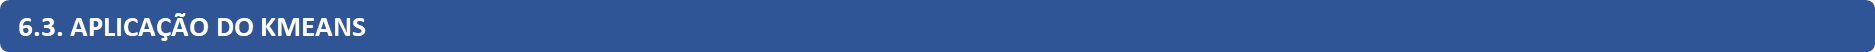

In [17]:
# Selecionado o número de clusters a partir da aplicação do elbow method, definido na etapa anterior.
KM = KMeans(n_clusters=el.elbow_value_, random_state=0)
grupo = KM.fit_predict(X)

In [18]:
# Adição da coluna 'Grupo' no DataFrame
df.loc[:, 'Grupo'] = grupo
df.head(3)

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic,Grupo
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,no,not much,no,2
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,no,not much,no,0
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,no,not much,no,1


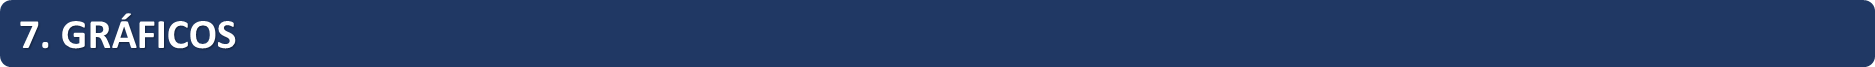

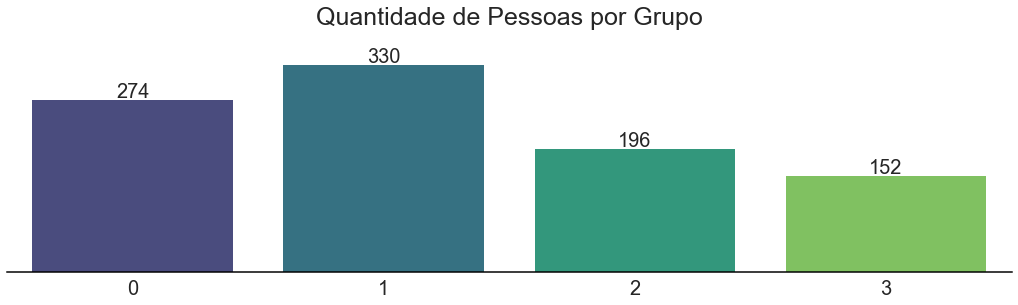

In [19]:
# Plotagem do gráfico com a quantidade de pessoas por grupo.
fig, ax = plt.subplots(figsize=(18, 4), )

sns.countplot('Grupo', data=df, palette='viridis')
ax.tick_params(axis='y', labelleft=False, grid_alpha=0.0), ax.tick_params(axis='x', labelsize=20)
ax.set_ylabel(''), ax.set_xlabel('')
ax.set_title('Quantidade de Pessoas por Grupo', fontsize=25, pad=30)
ax.spines['bottom'].set_linewidth(1.5), ax.spines['bottom'].set_color('black')
for axis in ['top', 'right', 'left']:    ax.spines[axis].set_color(None)
    
for i in ax.patches:
    ax.annotate('{:,}'.format(int(i.get_height())),
    (i.get_x() + i.get_width() / 2, i.get_height()),
    ha='center', va='baseline', xytext=(0,3),
    textcoords='offset points', fontsize=20) 

In [20]:
# Criação da função que gerará diversos gráficos de acordo com o número do Grupo informado.
def gerarGraficos(n_grupo):
    dfGrupo = df[df.Grupo == n_grupo]
    
    figura = plt.figure(figsize=(28, 30))
    figura.suptitle(f'GRUPO {n_grupo} - Visualização', fontsize=50)
    colors = sns.color_palette('viridis_r', 4)
    
    # ====================== GRÁFICO 1. GÊNERO ======================
    totalHomens = dfGrupo.Gender.value_counts()[0]
    totalMulheres = dfGrupo.Gender.value_counts()[1]
    totalGender = totalHomens + totalMulheres
    listaGender = [totalHomens / totalGender * 100, totalMulheres / totalGender * 100]
    labelsGender = [f'Male: {round(listaGender[0], 2)}%', f'Female: {round(listaGender[1], 2)}%']
    figura.add_subplot(3, 3, 1)
    gra1 = plt.pie(listaGender, wedgeprops={'linewidth':2, 'edgecolor': 'w'}, colors=colors)
    circulo = plt.Circle((0,0), 0.55, color='white')
    gra1 = plt.gcf()
    gra1.gca().add_artist(circulo)
    plt.legend(labelsGender, loc=8, fontsize=20)
    plt.title('% Homens e Mulheres ', fontsize=20, pad=50)
    plt.axis('equal');
    
    # ====================== GRÁFICO 2. IDADE ======================
    figura.add_subplot(3, 3, 2)
    gra2 = sns.countplot(x='Grupo', hue='Age', data=dfGrupo, palette=colors)
    gra2.set(yticklabels=[], xticklabels=[]), gra2.set(ylabel=None, xlabel=None)
    gra2.tick_params(left=False, bottom=False, grid_alpha=0.0)
    plt.legend(loc=10, fontsize=15, bbox_to_anchor=(0.92, 1))
    plt.title('Distribuição das Idades ', fontsize=20, pad=50)
    for i in gra2.patches:
        gra2.annotate(f'{int(i.get_height())}',
        (i.get_x() + i.get_width() / 2, i.get_height() + 1.5),
        ha='center', va='baseline', xytext=(0,1),
        textcoords='offset points', fontsize=15)
    for axis in ['top', 'right', 'bottom', 'left']:        
        gra2.spines[axis].set_color(None)
        
    # ====================== GRÁFICO 3. ATIVIDADES FÍSICAS ======================
    figura.add_subplot(3, 3, 3)
    gra3 = sns.countplot(x='PhysicallyActive', data=dfGrupo, palette=colors)
    gra3.set(yticklabels=[]), gra3.set(ylabel=None, xlabel=None)
    gra3.tick_params(left=False, bottom=False, grid_alpha=0.0)
    plt.title('Frequência de Atividade Física ', fontsize=20, pad=50)
    for i in gra3.patches:
        gra3.annotate(f'{int(i.get_height())}',
        (i.get_x() + i.get_width() / 2, i.get_height() + 1.5),
        ha='center', va='baseline', xytext=(0,1),
        textcoords='offset points', fontsize=15)
    for axis in ['top', 'right', 'bottom', 'left']:        
        gra3.spines[axis].set_color(None)
        
    # ====================== GRÁFICO 4. TOTAL FILHOS ======================
    figura.add_subplot(3, 3, 4)    
    listaLabelsPregancies = [i for i in dfGrupo.Pregancies.value_counts().reset_index().sort_values(by=['index']).Pregancies]    
    gra4 = sns.countplot(y='Pregancies', data=dfGrupo, palette=colors)
    gra4.set(xticklabels=''), gra4.set(ylabel=None, xlabel=None)
    gra4.tick_params(left=False, bottom=False, grid_alpha=0.0)
    plt.title('Total de Filhos ', fontsize=20, pad=50)
    for axis in ['top', 'right', 'bottom', 'left']:      gra4.spines[axis].set_color(None)  
    for i, v in enumerate(listaLabelsPregancies):        plt.text(v+1.5, i+0.05, s=(str(v)), color='black', fontsize=20)
        
    # ====================== GRÁFICO 5. DIVERSOS ======================
    qtdFumantes = np.round(dfGrupo.Smoking[dfGrupo.Smoking == 'yes'].value_counts() / dfGrupo.shape[0] * 100, 2)
    qtdAlcool = np.round(dfGrupo.Alcohol[dfGrupo.Alcohol == 'yes'].value_counts() / dfGrupo.shape[0] * 100, 2)
    qtdDiabetesFamilia = np.round(dfGrupo.Family_Diabetes[dfGrupo.Family_Diabetes == 'yes'].value_counts() / dfGrupo.shape[0] * 100, 2)
    qtdHighBP = np.round(dfGrupo.highBP[dfGrupo.highBP == 'yes'].value_counts() / dfGrupo.shape[0] * 100, 2)
    qtdRegularMedicine = np.round(dfGrupo.RegularMedicine[dfGrupo.RegularMedicine == 'yes'].value_counts() / dfGrupo.shape[0] * 100, 2)
    listaTempDiversos = [['Fumantes:', qtdFumantes[0]], 
                         ['Álcool:', qtdAlcool[0]], 
                         ['Diabetes Família:', qtdDiabetesFamilia[0]], 
                         ['Pressão Alta:', qtdHighBP[0]], 
                         ['Consulta Médica Regularmente:', qtdRegularMedicine[0]]]
    dfTemp = pd.DataFrame(np.array(listaTempDiversos).reshape(5,2), columns = ['Tipo', 'Qtd.'])
    figura.add_subplot(3, 3, 5)
    startingRadius = 0.7 + (0.5* (len(dfTemp)-1))
    for index, row in dfTemp.iterrows():
        scenario = row['Tipo']
        percentage = row['Qtd.']
        textLabel = scenario + ' ' + percentage + '%'    
        percentage = int(re.search(r'\d+', percentage).group())
        remainingPie = 100 - percentage
        donut_sizes = [remainingPie, percentage]
        plt.text(0.01, startingRadius - 0.15, textLabel, horizontalalignment='right', verticalalignment='top', fontsize=15)
        plt.pie(donut_sizes, radius=startingRadius, startangle=90, colors=['#B5EAD9', '#22a884'],
                wedgeprops={"edgecolor": "white", 'linewidth': 1})
        startingRadius-=0.4    
    plt.title('Diversos ', fontsize=20, pad=50)
    circle = plt.Circle(xy=(0, 0), radius=0.7, facecolor='white')
    plt.gca().add_artist(circle)
    plt.axis('equal');
    
    # ====================== GRÁFICO 6. NÍVEL STRESS ======================
    nivelStress = np.array(dfGrupo.Stress.value_counts())
    categorias = dfGrupo.Stress.unique()
    resultadosStress = {'': nivelStress}
    labelsStress = list(resultadosStress.keys())
    dataStress = np.array(list(resultadosStress.values()))
    dataCum = dataStress.cumsum(axis=1)
    categoryColors = plt.get_cmap('viridis_r')(np.linspace(0.15, 0.85, dataStress.shape[1]))
    figura.add_subplot(3, 3, 6)
    for i, (colname, color) in enumerate(zip(categorias, categoryColors)):
        widths = dataStress[:, i]
        starts = dataCum[:, i] - widths
        plt.barh(labelsStress, widths, left=starts, height=0.5, label=colname, color=color)
        xcenters = starts + widths / 2
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.1 else 'black'
        for y, (x, c) in enumerate(zip(xcenters, widths)): plt.text(x, y, int(c), ha='center', va='center',color=text_color, fontsize=20)
    plt.legend(ncol=len(categorias), bbox_to_anchor=(0.47, 1.025), loc='center',prop={'size':'14.5'})
    plt.title('Nível de Stress ', fontsize=20, pad=50)
    plt.axis('off');
    
    # ====================== GRÁFICO 7. FREQUÊNCIA URINA ======================
    percUriation= np.round(dfGrupo.Diabetic.value_counts()[0] / dfGrupo.shape[0] * 100, 1)
    labelUriation = dfGrupo.UriationFreq.unique()
    valUriation = np.round([percUriation, 100-percUriation], 2)
    labelsUriation = [f'{labelUriation[0]}: {valUriation[0]}%', f'{labelUriation[1]}:{valUriation[1]}%']
    figura.add_subplot(3, 3, 7)
    plt.pie(valUriation, colors=colors)
    plt.legend(labelsUriation, loc=0, fontsize=15, borderpad = 0.5, labelspacing = 0.5)
    plt.title('Frequência de Urina', fontsize=20, pad=50)
    plt.axis('equal');
    
    # ====================== GRÁFICO 8. JUNK FOOD ======================
    junkFood = np.array(dfGrupo.JunkFood.value_counts())
    categoriasJunkFood = dfGrupo.JunkFood.unique()
    resultadosJunk = {'': junkFood}
    labelsJunk = list(resultadosJunk.keys())
    dataJunk = np.array(list(resultadosJunk.values()))
    dataCumJunk = dataJunk.cumsum(axis=1)
    categoryColorsJunk = plt.get_cmap('viridis_r')(np.linspace(0.15, 0.85, dataJunk.shape[1]))
    labelsJunkFood = [f'{categoriasJunkFood[i]}: {junkFood[i]}' for i in range(len(categoriasJunkFood))]
    figura.add_subplot(3, 3, 8)
    for i, (colname, color) in enumerate(zip(categoriasJunkFood, categoryColorsJunk)):
        heights = dataJunk[:, i]
        starts = dataCumJunk[:, i]
        plt.barh(labelsJunkFood, 2000, height=heights, label=colname, color=color, align='edge')        
    plt.legend(labelsJunkFood, ncol=2, loc=9, bbox_to_anchor=(0.47, 1.08),prop={'size':'14.5'})
    plt.title('Consumo de Junk Food ', fontsize=20, pad=50)
    plt.axis('off');
    
    # ====================== GRÁFICO 9. DIABÉTICOS ======================
    percDiabetic = round(dfGrupo.value_counts()[0] / dfGrupo.shape[0] * 100, 1)
    labelDiabetic = dfGrupo.Diabetic.unique()
    valDiabetic = [percDiabetic, 100-percDiabetic]
    labelsDiabetic = [labelDiabetic[0], valDiabetic[0], [labelDiabetic[1], valDiabetic[1]]]
    valDiabetic.append(sum(valDiabetic))
    figura.add_subplot(3, 3, 9)
    colors=['#404788FF', '#22A884FF', 'w']
    plt.pie(valDiabetic, colors=colors)
    circulo = plt.Circle((0,0), 0.55, color='white')
    plt.gcf()
    plt.gca().add_artist(circulo)
    plt.legend(labelDiabetic, loc=10, fontsize=15, borderpad = 0.5, labelspacing = 0.5, edgecolor = 'w', 
               facecolor = 'gray', framealpha = 0.35)
    plt.title('Total de Diabéticos ', fontsize=20, pad=50)
    plt.axis('equal');

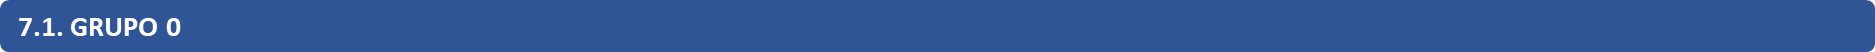

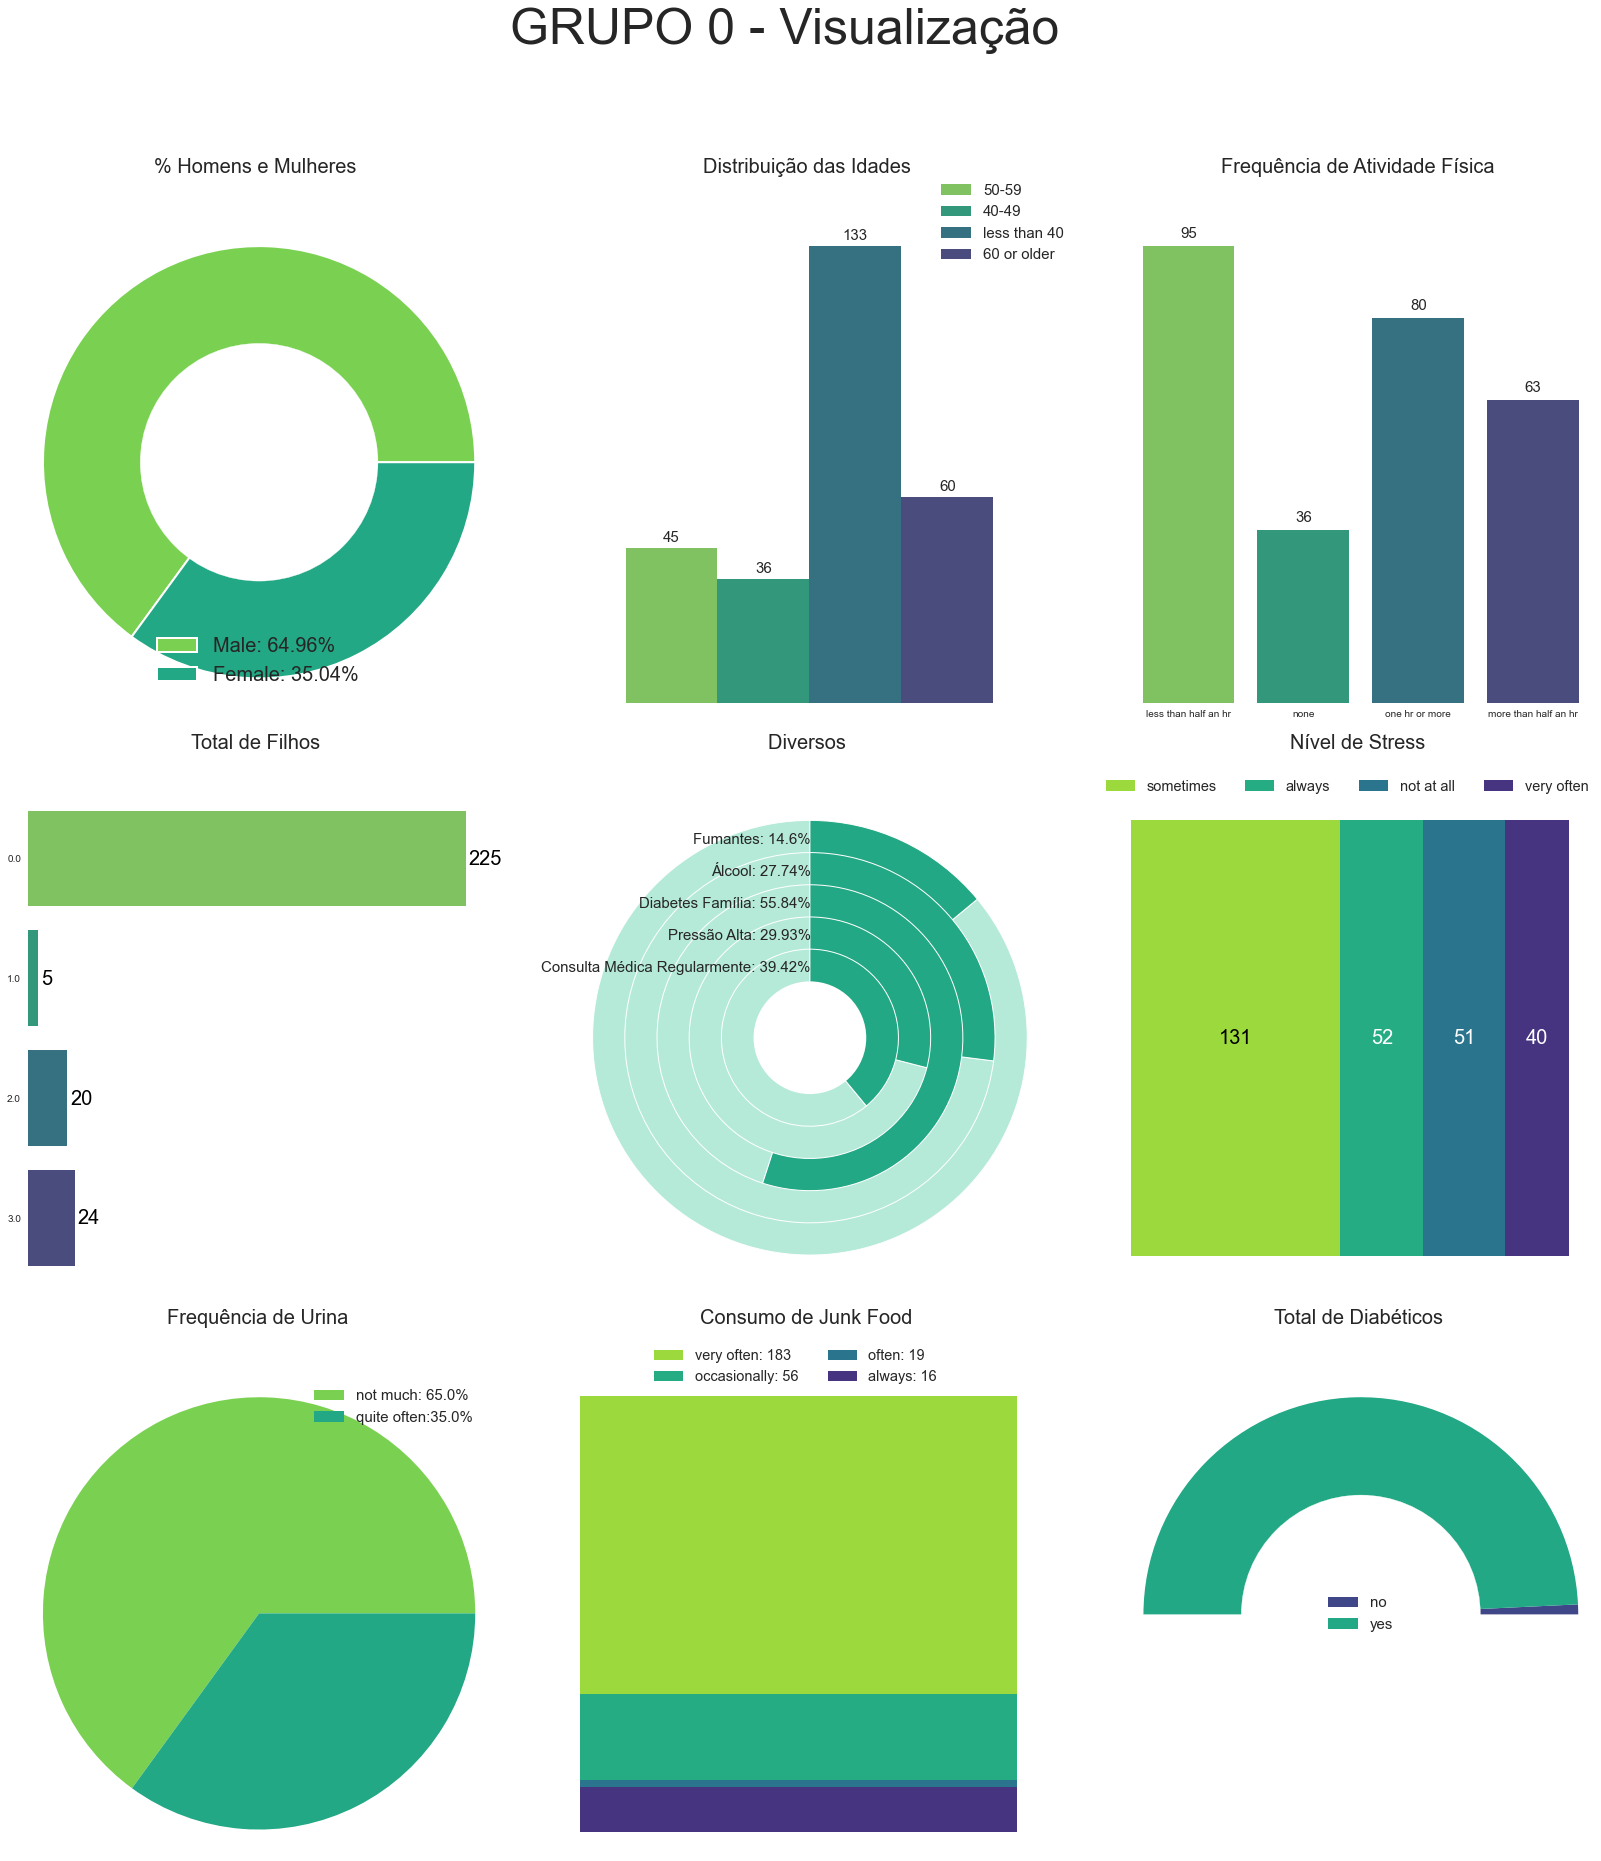

In [21]:
gerarGraficos(0)

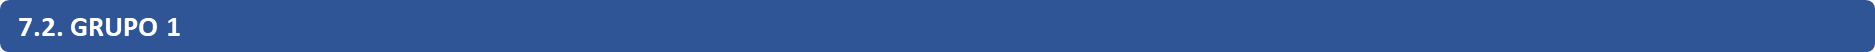

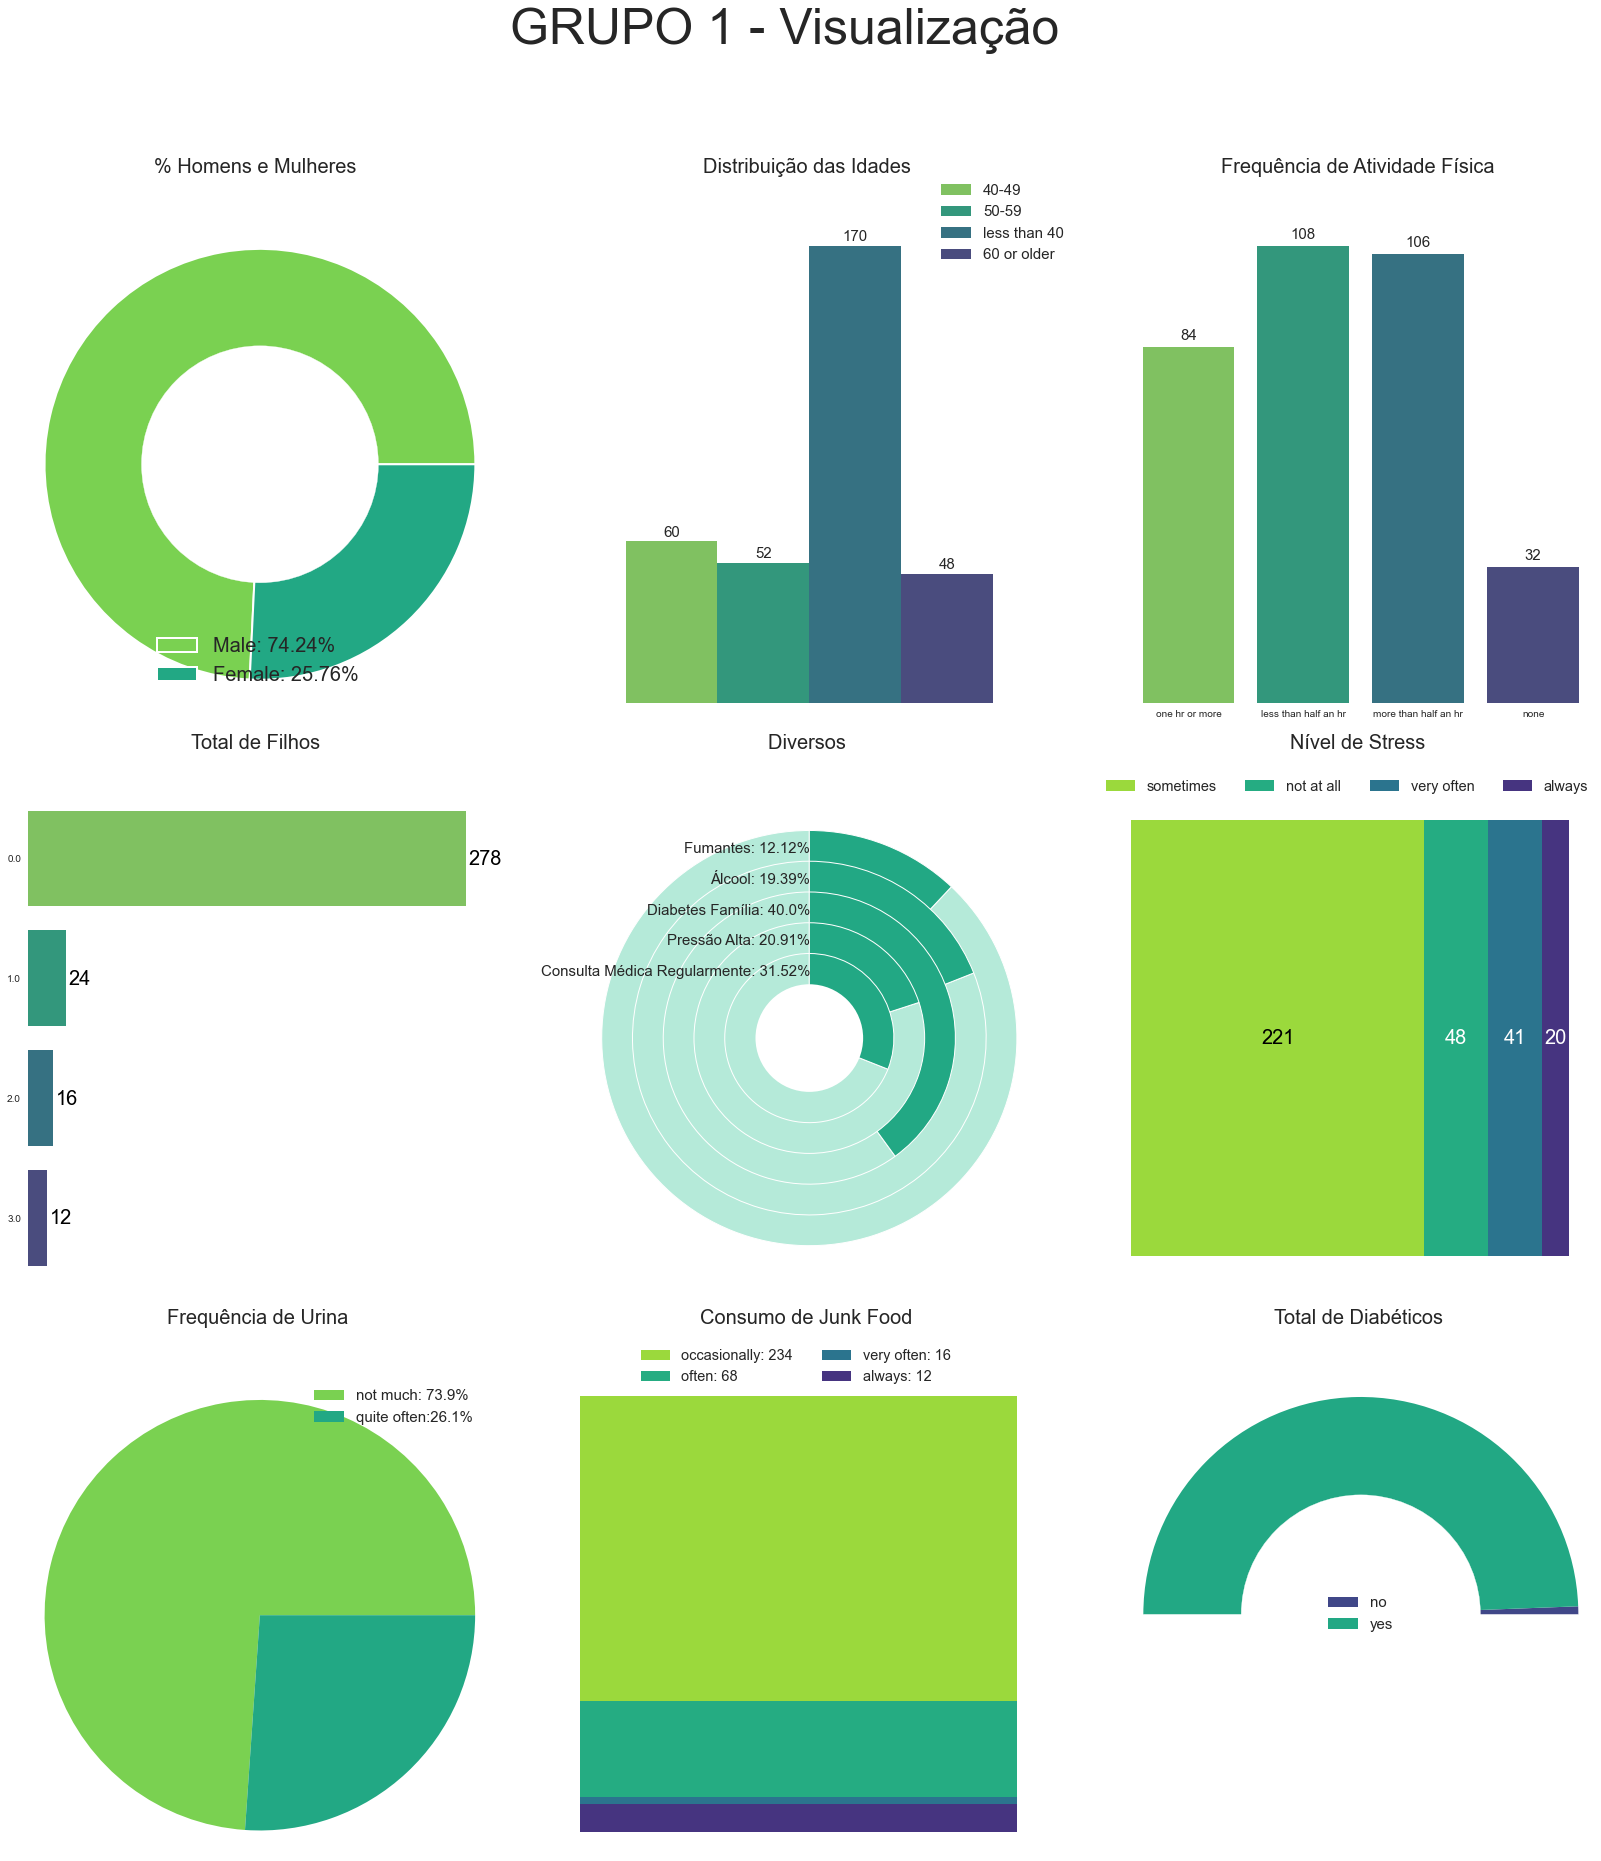

In [22]:
gerarGraficos(1)

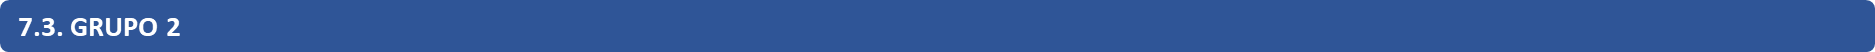

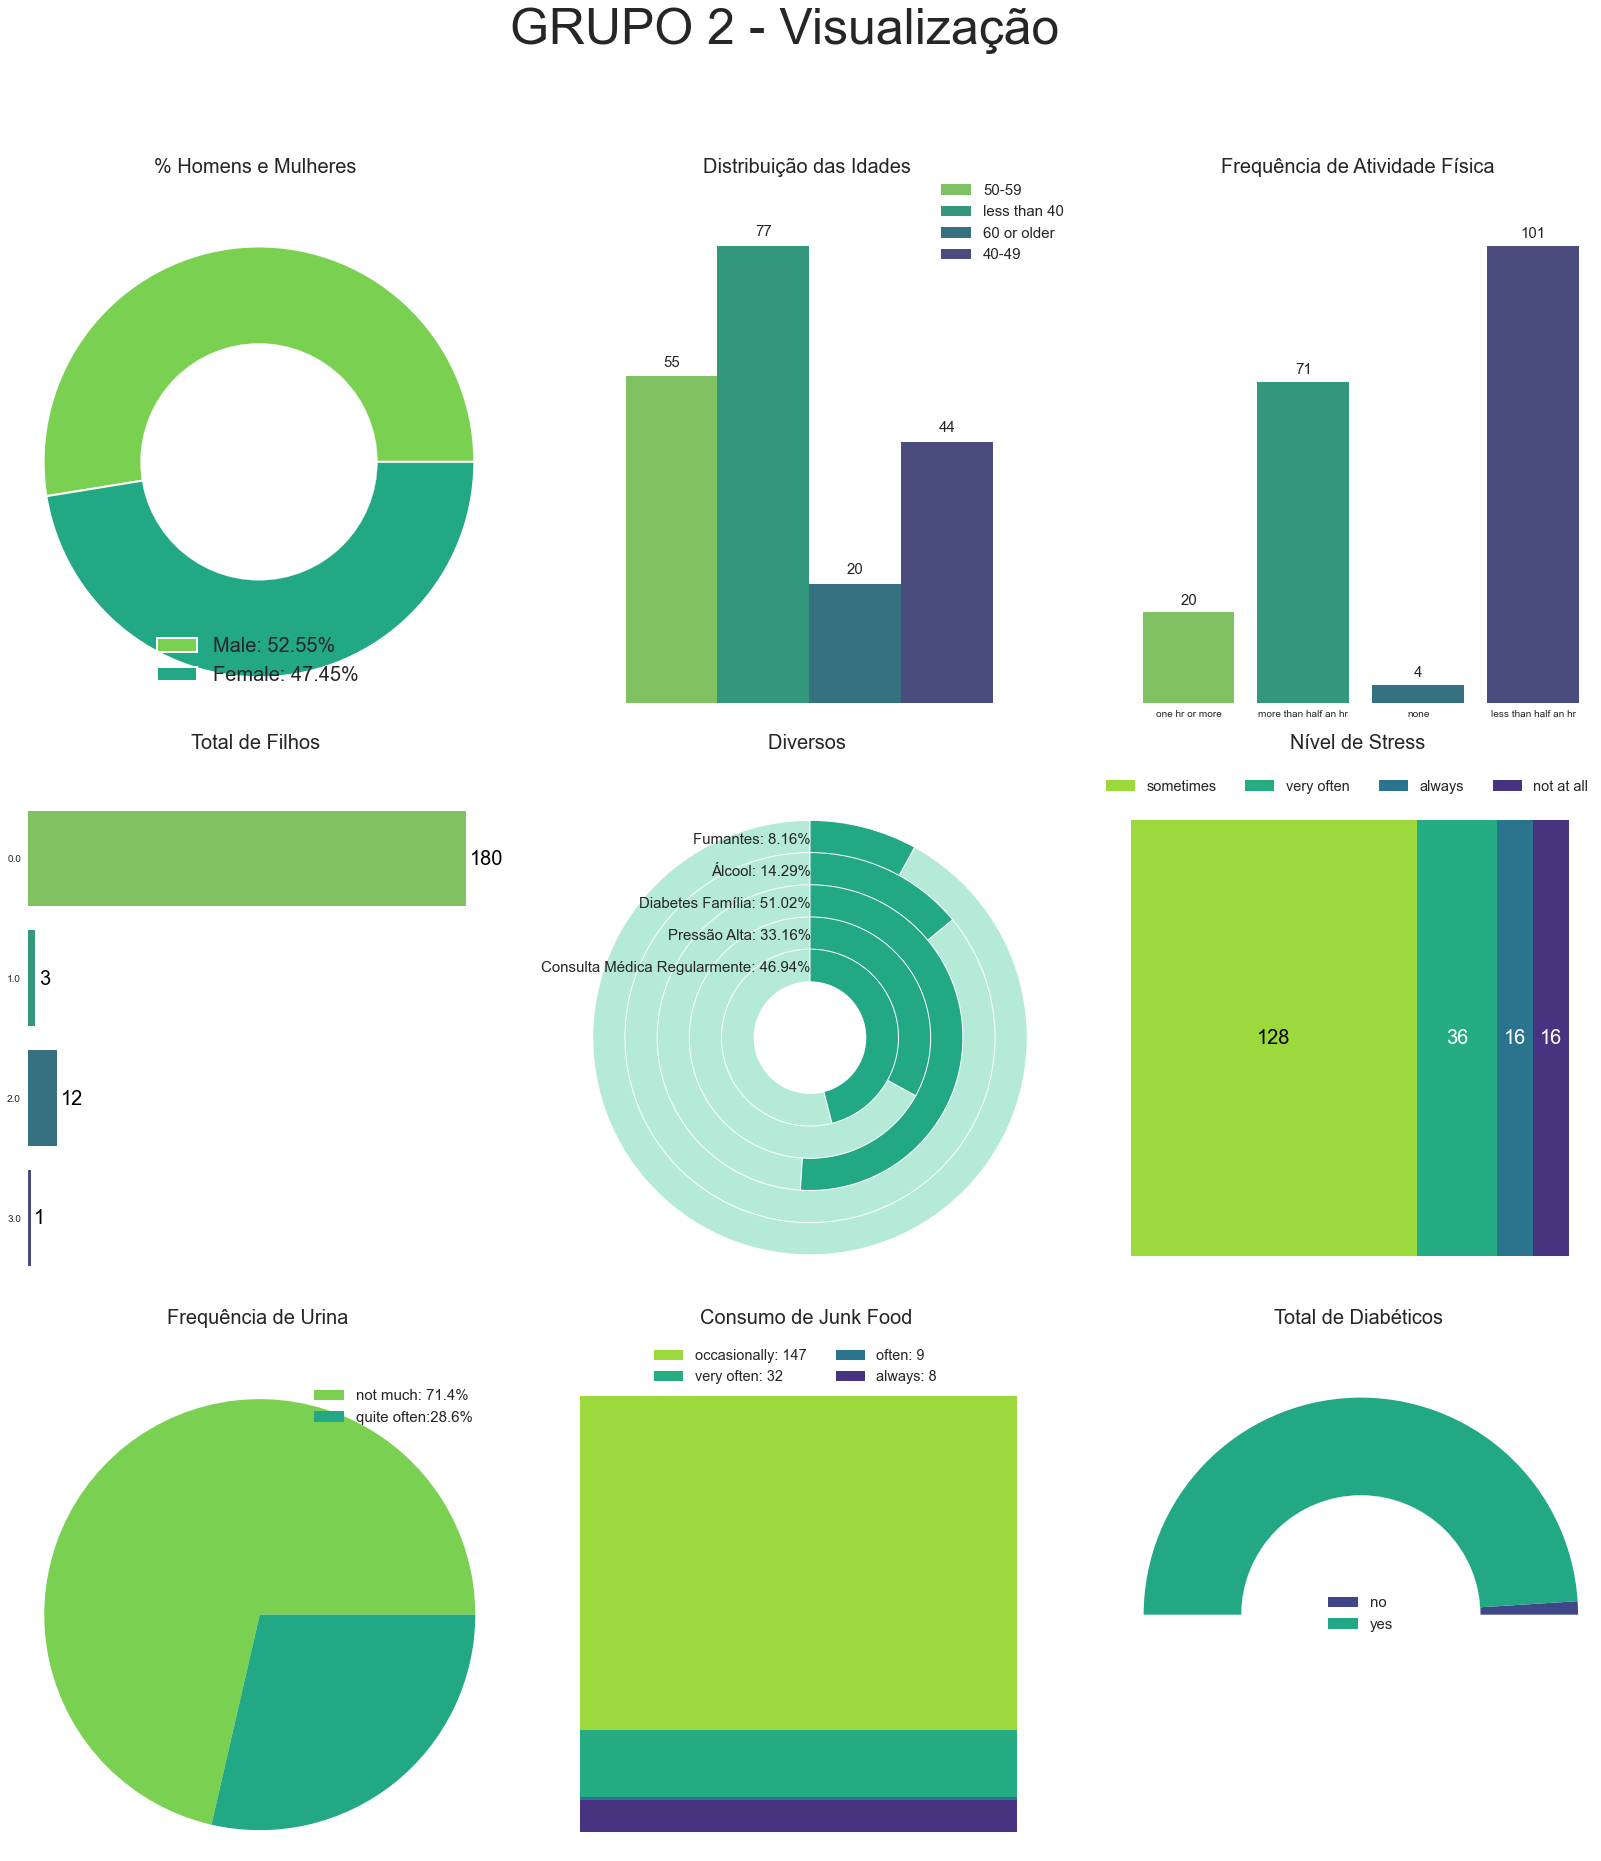

In [23]:
gerarGraficos(2)

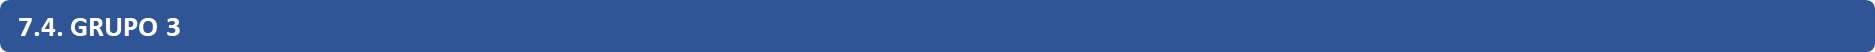

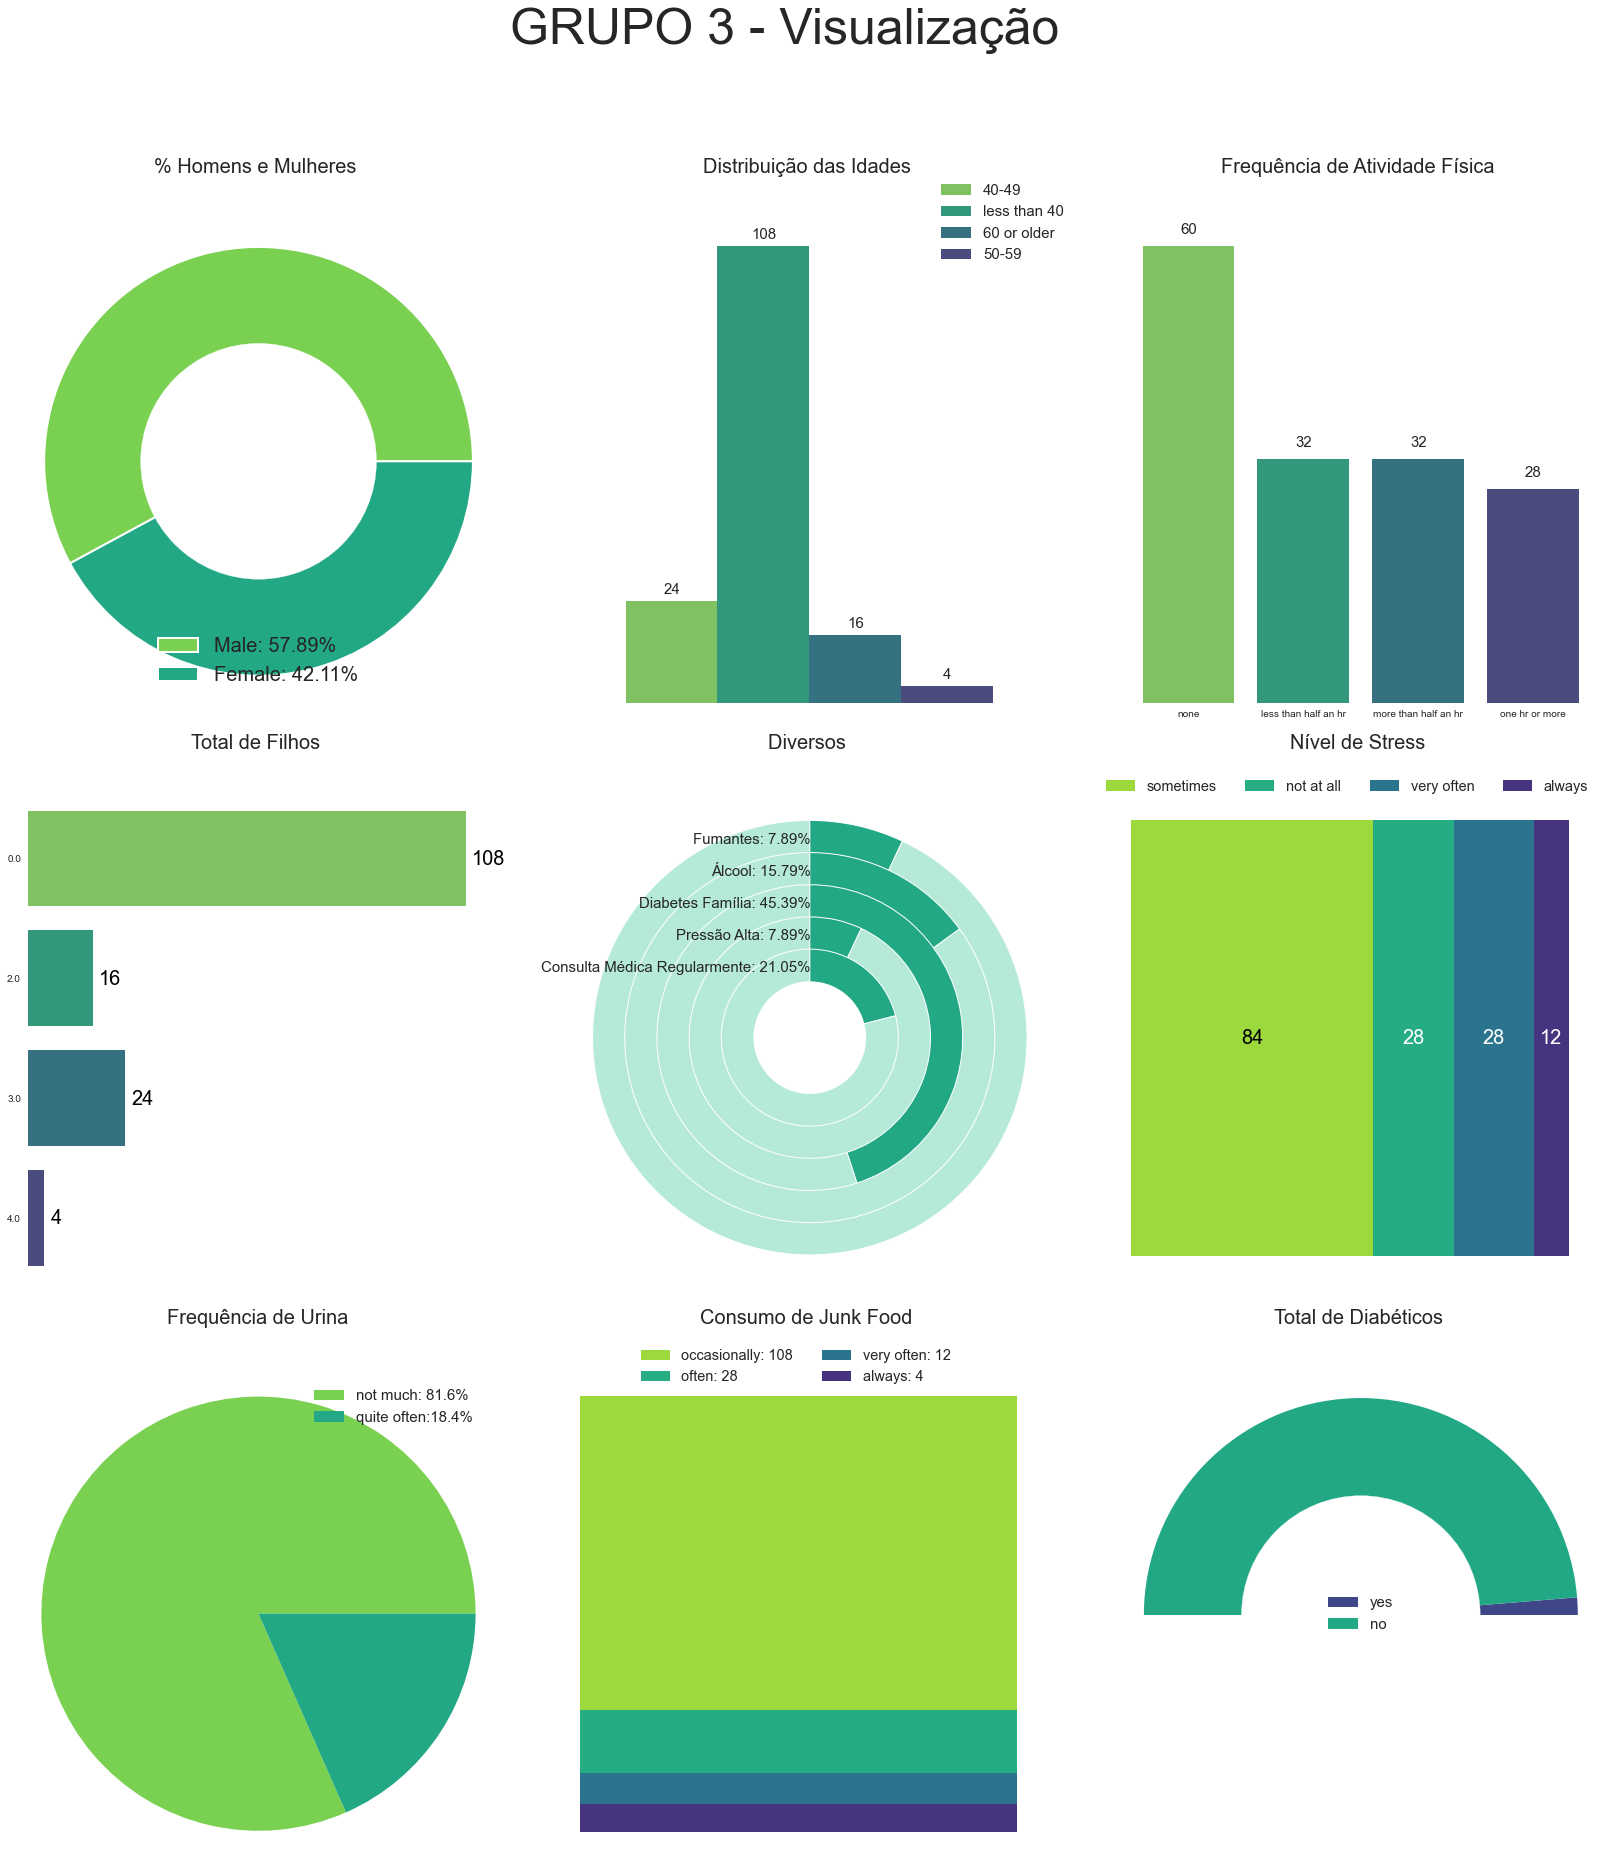

In [24]:
gerarGraficos(3)

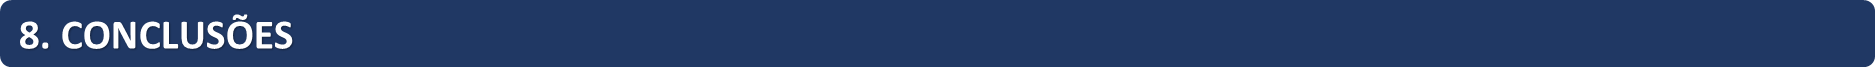

***
* Optei pela não utilização da técnica de Análise de Componentes Principais (PCA), usada para analisar e explicar as inter-relações entre um grande número de *features*, uma vez que o *Dataset* possui poucas caracaterísticas, visando também uma maior compreensão do modelo aplicado;


* O número de *clusters* adequado foi selecionado pela aplicação da biblioteca ***KElbowVisualizer***, conforme gráfico apresentado na etapa **6.2. DEFINIÇÃO DO NÚMERO DE CLUSTERS**;



* Em que pese o *Dataset* possuir algumas valores inconsistentes, tratados na etapa **5. FEATURE ENGINEERING**, acredito que o resultado ora disponibilizado seja satisfatório.

***

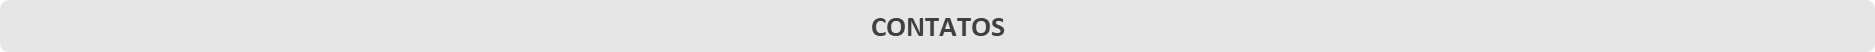

|                   Github                  	|                   Linkedin                   	|                    Email                    	|                 Kaggle                	|
|:-----------------------------------------:	|:--------------------------------------------:	|:--------------------------------------------:	|:------------------------------------:	|
| [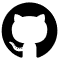](https://www.github.com/ThiagoFerreiraWD) 	| [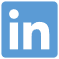](https://www.linkedin.com/in/tferreirasilva) 	| [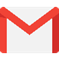](mailto:thiago.ferreirawd@gmail.com) 	| [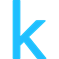](https://www.kaggle.com/thiagoferreirasilva) 	|